In [1]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

Right ascension: 14h 39m 36.5s
Declination    : -60° 50' 02
Distance        : 4.367 ly

In [11]:
FK5.frame_attributes.keys()

dict_keys(['equinox'])

In [5]:
c = SkyCoord("1h12m43.2s +1d12m43s", frame=Galactic)

In [6]:
c

<SkyCoord (Galactic): (l, b) in deg
    (18.18, 1.21194444)>

# NeW Tutorial

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2897783be90>

In [2]:
import astropy.units as u
from astropy.coordinates.baseframe import BaseCoordinateFrame
from astropy.coordinates.representation import CartesianRepresentation
from astropy.coordinates.representation.geodetic import (
    BaseBodycentricRepresentation,
    BaseGeodeticRepresentation,
)

In [3]:
class MarsBestFitAeroid(BaseGeodeticRepresentation):
    """
    A Spheroidal representation of Mars that minimized deviations with respect to the
    areoid following
        Ardalan A. A, R. Karimi, and E. W. Grafarend (2010)
        https://doi.org/10.1007/s11038-009-9342-7
    """

    _equatorial_radius = 3395.4280 * u.km
    _flattening = 0.5227617843759314 * u.percent

In [4]:
class MarsBestFitOcentricAeroid(BaseBodycentricRepresentation):
    """
    A Spheroidal planetocentric representation of Mars that minimized deviations with
    respect to the areoid following
        Ardalan A. A, R. Karimi, and E. W. Grafarend (2010)
        https://doi.org/10.1007/s11038-009-9342-7
    """

    _equatorial_radius = 3395.4280 * u.km
    _flattening = 0.5227617843759314 * u.percent

In [5]:
class MarsSphere(BaseGeodeticRepresentation):
    """
    A Spherical representation of Mars
    """

    _equatorial_radius = 3395.4280 * u.km
    _flattening = 0.0 * u.percent

In [6]:
class MarsCoordinateFrame(BaseCoordinateFrame):
    """
    A reference system for Mars.
    """

    name = "Mars"

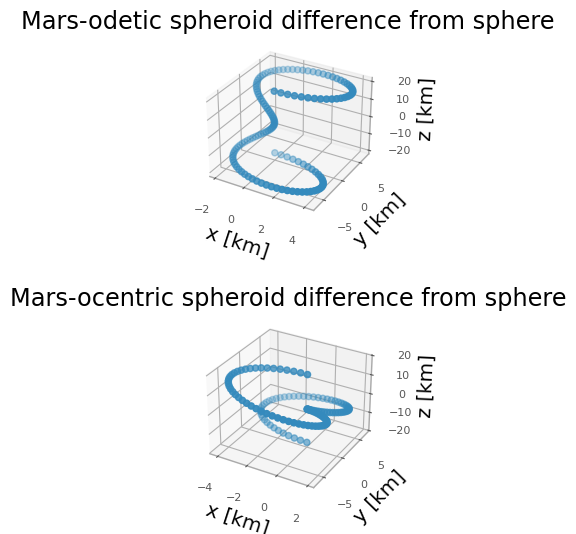

In [7]:
mars_sphere = MarsCoordinateFrame(
    lon=np.linspace(0, 360, 128) * u.deg,
    lat=np.linspace(-90, 90, 128) * u.deg,
    representation_type=MarsSphere,
)
mars = MarsCoordinateFrame(
    lon=np.linspace(0, 360, 128) * u.deg,
    lat=np.linspace(-90, 90, 128) * u.deg,
    representation_type=MarsBestFitAeroid,
)
mars_ocentric = MarsCoordinateFrame(
    lon=np.linspace(0, 360, 128) * u.deg,
    lat=np.linspace(-90, 90, 128) * u.deg,
    representation_type=MarsBestFitOcentricAeroid,
)

xyz_sphere = mars_sphere.represent_as(CartesianRepresentation)
xyz = mars.represent_as(CartesianRepresentation)
xyz_ocentric = mars_ocentric.represent_as(CartesianRepresentation)

fig, ax = plt.subplots(2, subplot_kw={"projection": "3d"})

ax[0].scatter(*((xyz - xyz_sphere).xyz << u.km))
ax[0].tick_params(labelsize=8)
ax[0].set(xlabel="x [km]", ylabel="y [km]", zlabel="z [km]")
ax[0].set_title("Mars-odetic spheroid difference from sphere")

ax[1].scatter(*((xyz_ocentric - xyz_sphere).xyz << u.km))
ax[1].tick_params(labelsize=8)
ax[1].set(xlabel="x [km]", ylabel="y [km]", zlabel="z [km]")

ax[1].set_title("Mars-ocentric spheroid difference from sphere")

plt.show()

# My conclusion
IDK WTF is this

# Final

In [8]:
from astropy.coordinates import SkyCoord, SkyOffsetFrame
from astropy import units as u

In [9]:
# ExoPlanet Coordinates
Planet_RA = "" * u.deg
Planet_Dec = "" * u.deg

target_planet = SkyCoord(Planet_RA, Planet_Dec, frame='icrs') 

In [ ]:
offset_frame = SkyOffsetFrame(origin=target_planet)
sun_offset = sun_coord.transform_to(offset_frame)

In [8]:
import pandas

df = pandas.read_csv("../planets_small.csv")

In [15]:
df['index'] = df.index
print(df.iloc[0])
print(df)
df.to_csv("../planets_with_index.csv")

pl_name     OGLE-TR-10 b
hostname      OGLE-TR-10
ra            267.867748
dec           -29.876476
index                  0
Name: 0, dtype: object
                    pl_name             hostname          ra        dec  index
0              OGLE-TR-10 b           OGLE-TR-10  267.867748 -29.876476      0
1              BD-08 2823 b           BD-08 2823  150.197196  -9.516569      1
2              BD-08 2823 c           BD-08 2823  150.197196  -9.516569      2
3               HD 104985 b            HD 104985  181.315785  76.905336      3
4                 bet Pic b              bet Pic   86.821234 -51.066148      4
...                     ...                  ...         ...        ...    ...
5754  OGLE-2019-BLG-0954L b  OGLE-2019-BLG-0954L  267.913250 -29.611000   5754
5755    MOA-2010-BLG-328L b    MOA-2010-BLG-328L  269.496333 -30.715175   5755
5756   KMT-2017-BLG-2509L b   KMT-2017-BLG-2509L  265.589875 -26.317150   5756
5757  OGLE-2017-BLG-1099L b  OGLE-2017-BLG-1099L  263.964250 -